# readme
descrip: plot SSH near global coast for Sunway LR, HR and Altimeter

update history: <br>
v1.0 DL 2021Apr12 <br>
v1.1 DL 2021May03 make publication-ready pics <br>

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
import xesmf as xe

# from eofs.xarray import Eof

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# load data

In [2]:
infile_obs = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
              'raw_data/zos_AVISO_L4_199210-201012.nc.nc4')
ds_obs = xr.open_dataset(infile_obs)
ds_obs

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 360, time: 219)
Coordinates:
  * time       (time) datetime64[ns] 1992-10-16T12:00:00 ... 2010-12-16T12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    zos        (time, lat, lon) float32 ...
Attributes: (12/29)
    institution:                     Centre National d'Etudes Spatiales
    institute_id:                    CNES
    experiment_id:                   obs
    source:                          SSALTO/DUACS
    model_id:                        Obs-AVISO
    contact:                         AVISO User Service, aviso@oceanobs.com
    ...                              ...
    project_id:                      obs4MIPs
    table_id:                        Table Omon_obs (31 January 2011) 3852a2b...
    title:                           Obs-AVISO model output prepared for obs4...
    modeling_realm:                  ocean
    cmor_version:                    2.5.3
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
weights_obs = np.cos(np.deg2rad(ds_obs.lat))
weights_obs.name = "weights_obs"
ssh_gl_av_obs = ds_obs.zos.weighted(weights_obs).mean(("lon", "lat")) # unit: m
ssh_gl_av_obs

<xarray.DataArray 'zos' (time: 219)>
array([0.51586877, 0.49270135, 0.45900224, 0.4453843 , 0.44330857,
       0.44285649, 0.44689792, 0.45415097, 0.46512328, 0.4765817 ,
       0.48982279, 0.49843559, 0.49937681, 0.48525292, 0.46483025,
       0.47460629, 0.46923653, 0.46943504, 0.45597434, 0.45995515,
       0.46790311, 0.48172345, 0.49274059, 0.49621509, 0.50075323,
       0.48372564, 0.46390109, 0.45477786, 0.45171714, 0.44915707,
       0.44836547, 0.4573833 , 0.46986221, 0.47786585, 0.48758237,
       0.49808022, 0.50019586, 0.49052566, 0.46605156, 0.4529325 ,
       0.4503488 , 0.44872631, 0.45274284, 0.46611566, 0.47723771,
       0.48831414, 0.49483311, 0.50322933, 0.50830168, 0.49080744,
       0.4596845 , 0.45220573, 0.45099354, 0.4497439 , 0.45252644,
       0.46297044, 0.47904355, 0.48868734, 0.50147208, 0.50777558,
       0.51207219, 0.49709426, 0.46760503, 0.46041311, 0.45913033,
       0.45964693, 0.46272805, 0.47013825, 0.4805738 , 0.49207567,
       0.50411129, 0.5133075 , 0.51548668, 0.49904081, 0.47649474,
       0.46443412, 0.46055426, 0.45993665, 0.46266866, 0.47032609,
       0.48039697, 0.49295983, 0.50494929, 0.51440602, 0.51550427,
       0.50255085, 0.48001771, 0.4686961 , 0.46623312, 0.46391034,
       0.4617609 , 0.47437552, 0.48609198, 0.49433008, 0.50589147,
       0.51750011, 0.51950109, 0.50486244, 0.47617694, 0.47069839,
...
       0.52280543, 0.50969711, 0.4869084 , 0.48031756, 0.47629434,
       0.47572483, 0.47715309, 0.48649448, 0.49852511, 0.50712351,
       0.51735386, 0.52805354, 0.5296267 , 0.51650883, 0.48843231,
       0.48016487, 0.47527745, 0.47852168, 0.47907185, 0.48611631,
       0.49886252, 0.5112612 , 0.52354116, 0.53144512, 0.53084582,
       0.5116629 , 0.49154061, 0.4833367 , 0.48050578, 0.47792382,
       0.47865504, 0.48744036, 0.497695  , 0.5113046 , 0.52411996,
       0.53302443, 0.53846974, 0.51961506, 0.49388273, 0.48513148,
       0.48312289, 0.47834956, 0.47894254, 0.48701082, 0.50050344,
       0.51477444, 0.52814776, 0.53954571, 0.54140817, 0.52468133,
       0.4923849 , 0.48584603, 0.482048  , 0.48186584, 0.48595337,
       0.49124234, 0.50012055, 0.51313138, 0.5243553 , 0.53568268,
       0.53571601, 0.527316  , 0.50710588, 0.4902802 , 0.48769009,
       0.48660396, 0.49391209, 0.50379936, 0.5153916 , 0.52134963,
       0.53004021, 0.53811018, 0.54328149, 0.53222149, 0.50806195,
       0.49526042, 0.4904164 , 0.49181798, 0.49488417, 0.50302787,
       0.51123187, 0.52407987, 0.53827359, 0.55212996, 0.55059148,
       0.53887161, 0.51347886, 0.49892312, 0.49682508, 0.49745416,
       0.49726036, 0.50518961, 0.52256081, 0.53720268, 0.54502578,
       0.54904787, 0.54670636, 0.52672867, 0.50020551])
Coordinates:
  * time     (time) datetime64[ns] 1992-10-16T12:00:00 ... 2010-12-16T12:00:00

In [4]:
ds_obs.zos.sel(time=slice('1993','2009')) 

<xarray.DataArray 'zos' (time: 204, lat: 180, lon: 360)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1993-01-16T12:00:00 ... 2009-12-16T12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    standard_name:     sea_surface_height_above_geoid
    long_name:         Sea Surface Height Above Geoid
    units:             m
    original_name:     maps_of_absolute_dynamic_topography
    history:           2011-02-11, 12:02:38, AVISO, Aviso2Cmor 2009-01-01 200...
    original_units:    cm
    cell_methods:      time: mean
    cell_measures:     area: areacello
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

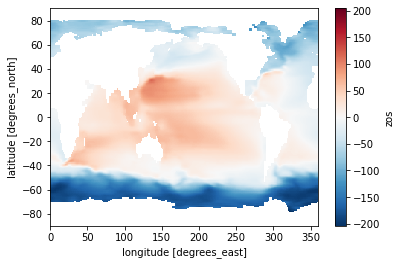

In [5]:
ssh1_obs = (ds_obs.zos-ssh_gl_av_obs).sel(time=slice('1993','2009')).mean('time')*100
ssh1_obs.plot()

In [6]:
indir = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
         'data_after_manipulation/SSH/')

infile1_TH = indir + 'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.1850-2100_2021Apr05.nc'
ds_TH = xr.open_dataset(infile1_TH)
ds_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time        (time) object 1850-07-16 21:59:59.999997 ... 2100-07-02 05:00...
    TLONG       (nlat, nlon) float64 ...
    TLAT        (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object ...
    SSH         (time, nlat, nlon) float32 ...
Attributes: (12/13)
    title:           B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    ...              ...
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    19331
    tavg_sum:        2676600.0
    tavg_sum_qflux:  2676600.0
    NCO:             netCDF Operators version 4.9.7 (Homepage = http://nco.sf...
    history:         Mon Apr  5 16:59:37 2021: ncra --mro -d time,,,12,12 B.E...

In [7]:
infile1_TL = indir + 'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.1850-2100_2021Apr05.nc'
ds_TL = xr.open_dataset(infile1_TL)
ds_TL

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 251)
Coordinates:
  * time        (time) object 1850-07-02 06:00:00 ... 2100-07-02 05:00:00.000003
    TLONG       (nlat, nlon) float64 ...
    TLAT        (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object ...
    SSH         (time, nlat, nlon) float32 ...
Attributes: (12/13)
    title:           B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:         Mon Apr  5 17:12:55 2021: ncra --mro -d time,,,12,12 B.E...
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    ...              ...
    start_time:      This dataset was created on 2020-04-11 at 22:12:21.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    25
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0
    NCO:             netCDF Operators version 4.9.7 (Homepage = http://nco.sf...

In [8]:
infile0_t12 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds0_t12 = xr.open_dataset(infile0_t12)
ds0_t12

<xarray.Dataset>
Dimensions:      (nlat: 2400, nlon: 3600, z_t: 62, z_w: 62, z_w_bot: 62)
Coordinates:
    TLAT         (nlat, nlon) float64 ...
    TLONG        (nlat, nlon) float64 ...
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05 5.75e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5.5e+05 5.75e+05 6e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    ULAT         (nlat, nlon) float64 ...
    ULONG        (nlat, nlon) float64 ...
    DXT          (nlat, nlon) float64 ...
    DYT          (nlat, nlon) float64 ...
    TAREA        (nlat, nlon) float64 ...
    KMT          (nlat, nlon) int32 ...
    REGION_MASK  (nlat, nlon) int32 ...
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:       [2400 3600]
    vertical_dims:      62
    vert_grid_file:     tx0.1v3_vert_grid
    horiz_grid_fname:   inputdata/ocn/pop/tx0.1v2/grid/horiz_grid_200709.ieeer8
    topography_fname:   inputdata/ocn/pop/tx0.1v2/grid/topography_km62_201711...
    region_mask_fname:  inputdata/ocn/pop/tx0.1v2/grid/region_mask_20080702.i...
    type:               tripole
    title:              POP_tx0.1v2 grid

In [9]:
infile0_g16 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds0_g16 = xr.open_dataset(infile0_g16)
ds0_g16

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
    TLAT         (nlat, nlon) float64 ...
    TLONG        (nlat, nlon) float64 ...
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    ULAT         (nlat, nlon) float64 ...
    ULONG        (nlat, nlon) float64 ...
    DXT          (nlat, nlon) float64 ...
    DYT          (nlat, nlon) float64 ...
    TAREA        (nlat, nlon) float64 ...
    KMT          (nlat, nlon) int32 ...
    REGION_MASK  (nlat, nlon) int32 ...
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:         [384 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

In [10]:
infile0_TL = ('/scratch/group/ihesp/archive/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/ocn/monthly/'
          'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_TL = xr.open_dataset(infile0_TL)
ds0_TL

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nchar: 256, nlat: 384, nlon: 320, time: 1, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates: (12/14)
  * time                  (time) object 1850-02-01 00:00:00
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ...                    ...
    transport_components  (transport_comp, nchar) |S1 ...
    transport_regions     (transport_reg, nchar) |S1 ...
    ULONG                 (nlat, nlon) float64 ...
    ULAT                  (nlat, nlon) float64 ...
    TLONG                 (nlat, nlon) float64 ...
    TLAT                  (nlat, nlon) float64 ...
Dimensions without coordinates: d2, moc_comp, nchar, nlat, nlon, transport_comp, transport_reg
Data variables: (12/137)
    time_bound            (time, d2) object ...
    moc_components        (moc_comp, nchar) |S1 ...
    dz                    (z_t) float32 ...
    dzw                   (z_w) float32 ...
    KMT                   (nlat, nlon) float64 ...
    KMU                   (nlat, nlon) float64 ...
    ...                    ...
    XBLT                  (time, nlat, nlon) float32 ...
    TBLT                  (time, nlat, nlon) float32 ...
    BSF                   (time, nlat, nlon) float32 ...
    MOC                   (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...
    N_HEAT                (time, transport_reg, transport_comp, lat_aux_grid) float32 ...
    N_SALT                (time, transport_reg, transport_comp, lat_aux_grid) float32 ...
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-11 at 22:22:40.9
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  750
    tavg_sum:      2592000.0

# data analysis 

In [11]:
ssh_gl_av_TH = ds_TH.SSH.sel(time=slice('1993','2009')).weighted(ds0_t12.TAREA).mean(("nlon", "nlat"))
ssh_gl_av_TH # unit: cm, offset is -0.215 cm

<xarray.DataArray 'SSH' (time: 17)>
array([-0.21559634, -0.21558886, -0.21557792, -0.21557362, -0.21556238,
       -0.21555882, -0.21555089, -0.21553308, -0.21550781, -0.21549408,
       -0.21547392, -0.21545672, -0.21545275, -0.21544445, -0.21544019,
       -0.21543916, -0.21542666])
Coordinates:
  * time     (time) object 1993-07-02 05:00:00.000003 ... 2009-07-02 05:00:00...

In [12]:
ssh_gl_av_TL = ds_TL.SSH.sel(time=slice('1993','2009')).weighted(ds0_g16.TAREA).mean(("nlon", "nlat")) 
ssh_gl_av_TL # unit: cm, offset is -5e-5 cm

<xarray.DataArray 'SSH' (time: 17)>
array([-5.80855021e-05, -5.81944513e-05, -5.83482171e-05, -5.83436072e-05,
       -5.83320834e-05, -5.85948886e-05, -5.88958518e-05, -5.90513870e-05,
       -5.92008421e-05, -5.94182806e-05, -5.94969830e-05, -5.98177001e-05,
       -5.97770075e-05, -5.95613764e-05, -5.93287648e-05, -5.94123091e-05,
       -5.95476181e-05])
Coordinates:
  * time     (time) object 1993-07-02 05:00:00.000003 ... 2009-07-02 05:00:00...

In [13]:
ssh1_TH = ds_TH.SSH.sel(time=slice('1993','2009')).mean('time').where(ds0_t12.KMT>0,np.nan)+0.215
# mask land with nan and subtract offset for HR
ssh2_TH = ds_TH.SSH.sel(time=slice('2084','2100')).mean('time').where(ds0_t12.KMT>0,np.nan)+0.215
ssh_df_TH = ssh2_TH - ssh1_TH

ssh1_TL = ds_TL.SSH.sel(time=slice('1993','2009')).mean('time').where(ds0_g16.KMT>0,np.nan)
# mask land with nan, no need to subtract offset for LR cause it's too small
ssh2_TL = ds_TL.SSH.sel(time=slice('2084','2100')).mean('time').where(ds0_g16.KMT>0,np.nan)
ssh_df_TL = ssh2_TL - ssh1_TL

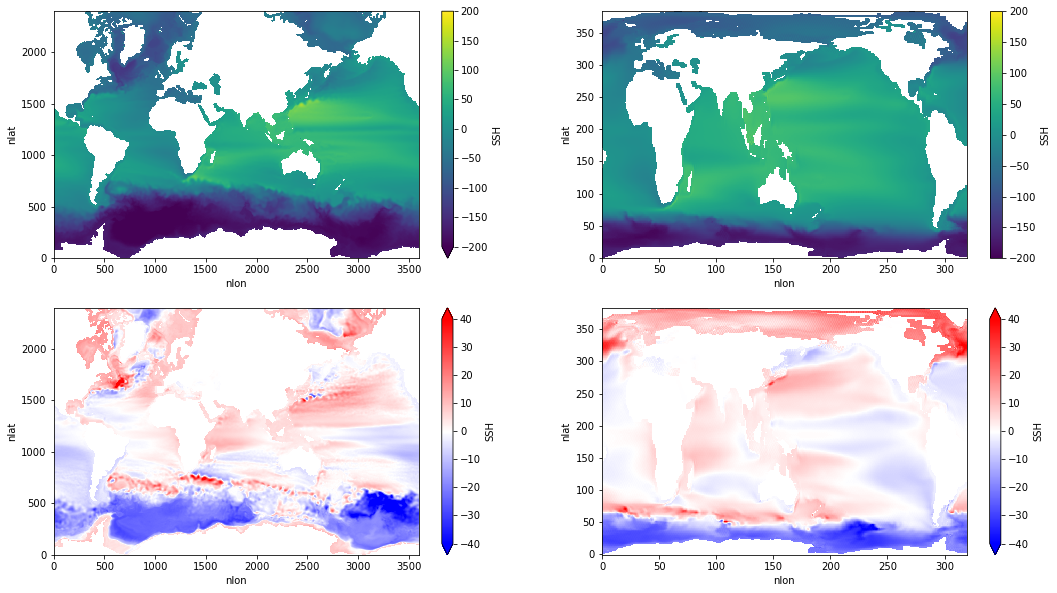

In [14]:
fig, axes = plt.subplots(2,2,figsize=(18,10))
ssh1_TH.plot(ax=axes[0,0],vmin=-200,vmax=200)
ssh1_TL.plot(ax=axes[0,1],vmin=-200,vmax=200)
ssh_df_TH.plot(ax=axes[1,0],vmin=-40,vmax=40,cmap='bwr')
ssh_df_TL.plot(ax=axes[1,1],vmin=-40,vmax=40,cmap='bwr')

regrid t12 to g16

In [15]:
ds0_g16_rn = ds0_g16.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
ds0_t12_rn = ds0_t12.rename({'TLONG': 'lon', 'TLAT': 'lat'})
regridder_t12_g16 = xe.Regridder(ds0_t12_rn, ds0_g16_rn, method='bilinear', periodic=True,
                        filename='bilinear_POPt12_g16_Global_periodic_2021Apr12.nc', reuse_weights=True) # 
regridder_t12_g16

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_POPt12_g16_Global_periodic_2021Apr12.nc 
Reuse pre-computed weights? True 
Input grid shape:           (2400, 3600) 
Output grid shape:          (384, 320) 
Periodic in longitude?      True

In [16]:
ssh1_rgd_TH = regridder_t12_g16(ssh1_TH)
ssh_df_rgd_TH = regridder_t12_g16(ssh_df_TH)

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


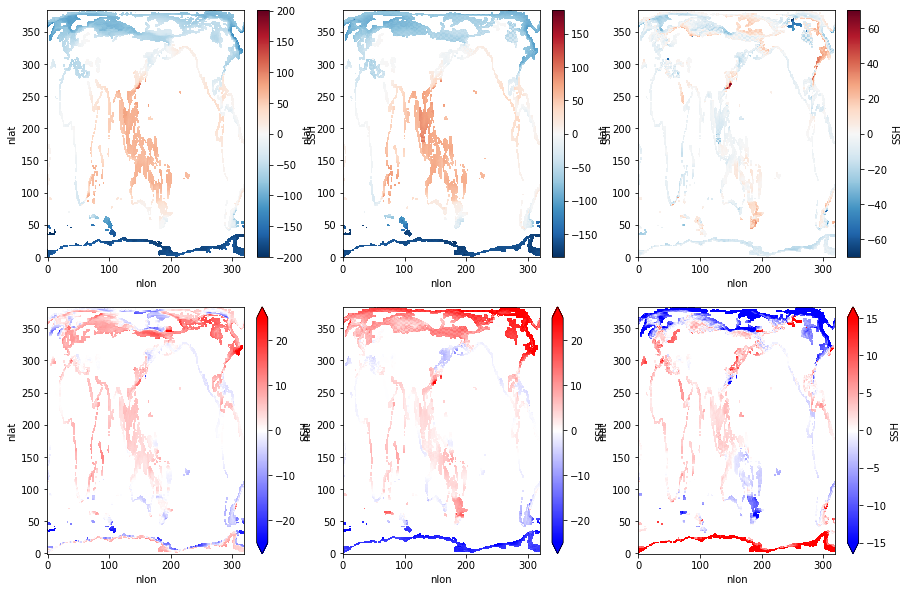

In [17]:
fig, axes = plt.subplots(2,3,figsize=(15,10))
ssh1_rgd_TH.where(ds0_g16.KMT<47,np.nan).plot(ax=axes[0,0])
ssh1_TL.where(ds0_g16.KMT<47,np.nan).plot(ax=axes[0,1])
(ssh1_rgd_TH-ssh1_TL).where(ds0_g16.KMT<47,np.nan).plot(ax=axes[0,2])
ssh_df_rgd_TH.where(ds0_g16.KMT<47,np.nan).plot(ax=axes[1,0],vmin=-25,vmax=25,cmap='bwr')
ssh_df_TL.where(ds0_g16.KMT<47,np.nan).plot(ax=axes[1,1],vmin=-25,vmax=25,cmap='bwr')
(ssh_df_rgd_TH-ssh_df_TL).where(ds0_g16.KMT<47,np.nan).plot(ax=axes[1,2],vmin=-15,vmax=15,cmap='bwr')

regrid satellite grids to g16 grid

In [18]:
regridder_obs1deg_g16 = xe.Regridder(ds_obs, ds0_g16_rn, method='bilinear', periodic=True,
                        filename='bilinear_obs1deg_g16_Global_periodic_2021Apr13.nc',reuse_weights=True)
regridder_obs1deg_g16

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_obs1deg_g16_Global_periodic_2021Apr13.nc 
Reuse pre-computed weights? True 
Input grid shape:           (180, 360) 
Output grid shape:          (384, 320) 
Periodic in longitude?      True

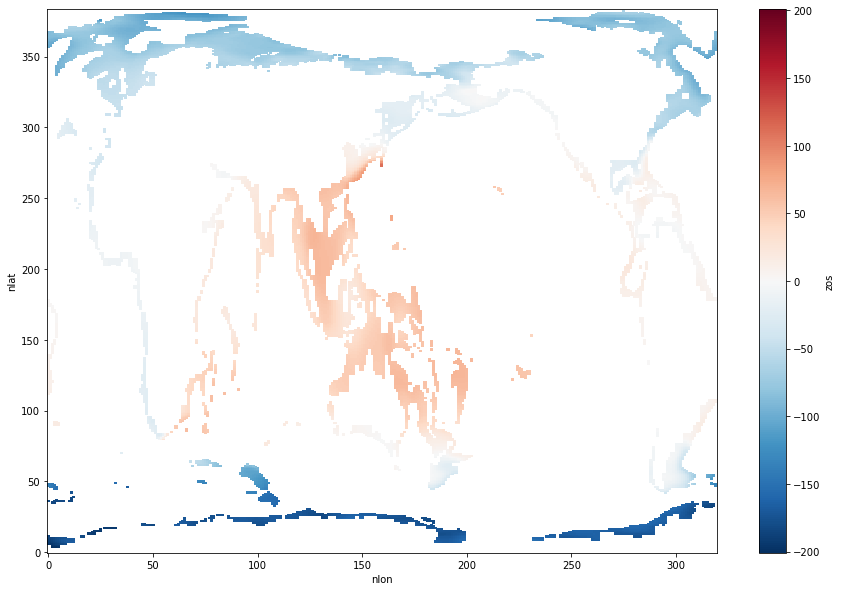

In [19]:
ssh1_rgd_obs = regridder_obs1deg_g16(ssh1_obs)
fig, axes = plt.subplots(1,1,figsize=(15,10))
ssh1_rgd_obs.where(ds0_g16.KMT<47,np.nan).plot(ax=axes)

# make pics 
add cylic for POP before plotting

In [20]:
def pop_add_cyclic(ds):
    '''readme: copied by DL on 2021Apr13 from Matt Long github 
    https://gist.github.com/matt-long/50433da346da8ac17cde926eec90a87c'''
    nj = ds.TLAT.shape[0]
    ni = ds.TLONG.shape[1]

    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = ds.TLONG.data
    tlat = ds.TLAT.data
    
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon)    
    lon  = np.concatenate((tlon, tlon + 360.), 1)
    lon = lon[:, xL:xR]

    if ni == 320:
        lon[367:-3, 0] = lon[367:-3, 0] + 360.        
    lon = lon - 360.
    
    lon = np.hstack((lon, lon[:, 0:1] + 360.))
    if ni == 320:
        lon[367:, -1] = lon[367:, -1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:, 0] = lon[:, 0] - 1e-8

    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))

    TLAT = xr.DataArray(lat, dims=('nlat', 'nlon'))
    TLONG = xr.DataArray(lon, dims=('nlat', 'nlon'))
    
    dso = xr.Dataset({'TLAT': TLAT, 'TLONG': TLONG})

    # copy vars
    varlist = [v for v in ds.data_vars if v not in ['TLAT', 'TLONG']]
    for v in varlist:
        v_dims = ds[v].dims
        if not ('nlat' in v_dims and 'nlon' in v_dims):
            dso[v] = ds[v]
        else:
            # determine and sort other dimensions
            other_dims = set(v_dims) - {'nlat', 'nlon'}
            other_dims = tuple([d for d in v_dims if d in other_dims])
            lon_dim = ds[v].dims.index('nlon')
            field = ds[v].data
            field = np.concatenate((field, field), lon_dim)
            field = field[..., :, xL:xR]
            field = np.concatenate((field, field[..., :, 0:1]), lon_dim)       
            dso[v] = xr.DataArray(field, dims=other_dims+('nlat', 'nlon'), 
                                  attrs=ds[v].attrs)


    # copy coords
    for v, da in ds.coords.items():
        if not ('nlat' in da.dims and 'nlon' in da.dims):
            dso = dso.assign_coords(**{v: da})
                
            
    return dso

In [21]:
ds0_TL.HT.drop('ULONG').drop('ULAT')

<xarray.DataArray 'HT' (nlat: 384, nlon: 320)>
[122880 values with dtype=float64]
Coordinates:
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:  ocean depth at T points
    units:      centimeter

In [22]:
ds0_g16['ssh1_rgd_TH'] = ssh1_rgd_TH
ds0_g16['ssh1_TL'] = ssh1_TL
ds0_g16['ssh1_rgd_obs'] = ssh1_rgd_obs
ds0_g16['ssh_df_rgd_TH'] = ssh_df_rgd_TH
ds0_g16['ssh_df_TL'] = ssh_df_TL
ds0_g16['HT_TL'] = ds0_TL.HT.drop('ULONG').drop('ULAT')
ds0_g16

<xarray.Dataset>
Dimensions:        (nlat: 384, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
    TLAT           (nlat, nlon) float64 ...
    TLONG          (nlat, nlon) float64 ...
  * z_t            (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w            (z_w) float64 0.0 1e+03 2e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot        (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5.25e+05 5.5e+05
    lon            (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
    lat            (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.19 72.19
Dimensions without coordinates: nlat, nlon
Data variables: (12/14)
    ULAT           (nlat, nlon) float64 ...
    ULONG          (nlat, nlon) float64 ...
    DXT            (nlat, nlon) float64 ...
    DYT            (nlat, nlon) float64 ...
    TAREA          (nlat, nlon) float64 1.39e+13 1.39e+13 ... 7.432e+12
    KMT            (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    ...             ...
    ssh1_rgd_TH    (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan
    ssh1_TL        (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan
    ssh1_rgd_obs   (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan
    ssh_df_rgd_TH  (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan
    ssh_df_TL      (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan
    HT_TL          (nlat, nlon) float64 ...
Attributes:
    lateral_dims:         [384 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

In [23]:
ds0_g16_ac = pop_add_cyclic(ds0_g16) # ac: add cyclic
ds0_g16_ac

<xarray.Dataset>
Dimensions:        (nlat: 384, nlon: 321, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
  * z_t            (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w            (z_w) float64 0.0 1e+03 2e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot        (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables: (12/16)
    TLAT           (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 80.31 80.31
    TLONG          (nlat, nlon) float64 -220.6 -219.4 -218.3 ... -39.57 -39.86
    ULAT           (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 80.03 80.03
    ULONG          (nlat, nlon) float64 140.0 141.1 142.3 ... 320.5 320.3 320.0
    DXT            (nlat, nlon) float64 2.339e+06 2.339e+06 ... 5.335e+05
    DYT            (nlat, nlon) float64 5.94e+06 5.94e+06 ... 6.263e+06
    ...             ...
    ssh1_rgd_TH    (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan
    ssh1_TL        (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan
    ssh1_rgd_obs   (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan
    ssh_df_rgd_TH  (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan
    ssh_df_TL      (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan
    HT_TL          (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


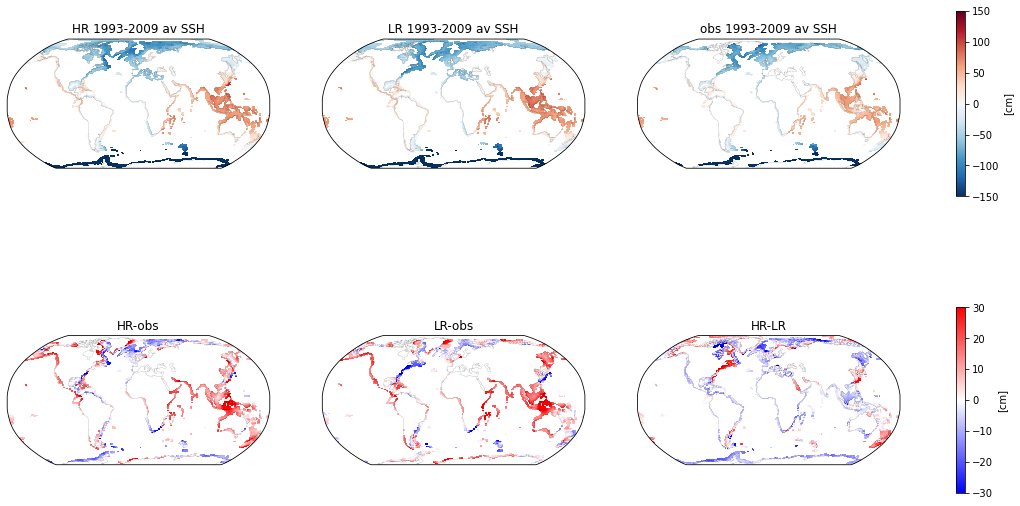

In [24]:
proj = cartopy.crs.Robinson(central_longitude=0)
pc = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(231,projection=proj)
subplt1=ax1.pcolormesh(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
        ds0_g16_ac.ssh1_rgd_TH.where(ds0_g16_ac.HT_TL<2e5,np.nan), transform=pc, 
        vmin=-150, vmax=150, cmap="RdBu_r")
# subplt1=ax1.pcolormesh(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
#         ds0_g16_ac.ssh1_rgd_TH.where((ht>0)&(ht<1000*100)), transform=pc, vmin=-150, vmax=150, cmap="RdBu_r")
ax1.coastlines(resolution='110m',color='black', linewidth=0.1)
ax1.set_title('HR 1993-2009 av SSH')

ax2 = fig.add_subplot(232,projection=proj)
subplt2=ax2.pcolormesh(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
        ds0_g16_ac.ssh1_TL.where(ds0_g16_ac.HT_TL<2e5,np.nan), transform=pc, 
        vmin=-150, vmax=150, cmap="RdBu_r")
ax2.coastlines(resolution='110m',color='black', linewidth=0.1)
ax2.set_title('LR 1993-2009 av SSH')

ax3 = fig.add_subplot(233,projection=proj)
subplt3=ax3.pcolormesh(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
        ds0_g16_ac.ssh1_rgd_obs.where(ds0_g16_ac.HT_TL<2e5,np.nan), transform=pc, 
        vmin=-150, vmax=150, cmap="RdBu_r")
ax3.coastlines(resolution='110m',color='black', linewidth=0.1)
ax3.set_title('obs 1993-2009 av SSH')

# # Now adding the colorbar
cb = fig.colorbar(subplt3, ax=[ax1,ax2,ax3], shrink=0.75)
cb.set_label('[cm]')

ax4 = fig.add_subplot(234,projection=proj)
subplt4=ax4.pcolormesh(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
        (ds0_g16_ac.ssh1_rgd_TH-ds0_g16_ac.ssh1_rgd_obs).where(ds0_g16_ac.HT_TL<2e5,np.nan), 
        transform=pc, vmin=-30, vmax=30, cmap="bwr")
ax4.coastlines(resolution='110m',color='black', linewidth=0.1)
ax4.set_title('HR-obs')

ax5 = fig.add_subplot(235,projection=proj)
subplt5=ax5.pcolormesh(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
        (ds0_g16_ac.ssh1_TL-ds0_g16_ac.ssh1_rgd_obs).where(ds0_g16_ac.HT_TL<2e5,np.nan),
        transform=pc, vmin=-30, vmax=30, cmap="bwr")
ax5.coastlines(resolution='110m',color='black', linewidth=0.1)
ax5.set_title('LR-obs')

ax6 = fig.add_subplot(236,projection=proj)
subplt6=ax6.pcolormesh(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
        (ds0_g16_ac.ssh1_rgd_TH-ds0_g16_ac.ssh1_TL).where(ds0_g16_ac.HT_TL<2e5,np.nan), 
        transform=pc, vmin=-30, vmax=30, cmap="bwr")
ax6.coastlines(resolution='110m',color='black', linewidth=0.1)
ax6.set_title('HR-LR')

# # Now adding the colorbar
cb = fig.colorbar(subplt6, ax=[ax4,ax5,ax6], shrink=0.75)
cb.set_label('[cm]')

# ax3 = fig.add_subplot(234,projection=proj)
# subplt3=ax3.pcolormesh(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
#         (ds0_g16_ac.ssh1_rgd_TH-ds0_g16_ac.ssh1_TL).where(ds0_g16_ac.KMT<kmt_th,np.nan), 
#                        transform=pc, vmin=-30, vmax=30, cmap="RdBu_r")
# ax3.coastlines(resolution='110m',color='black', linewidth=0.1)

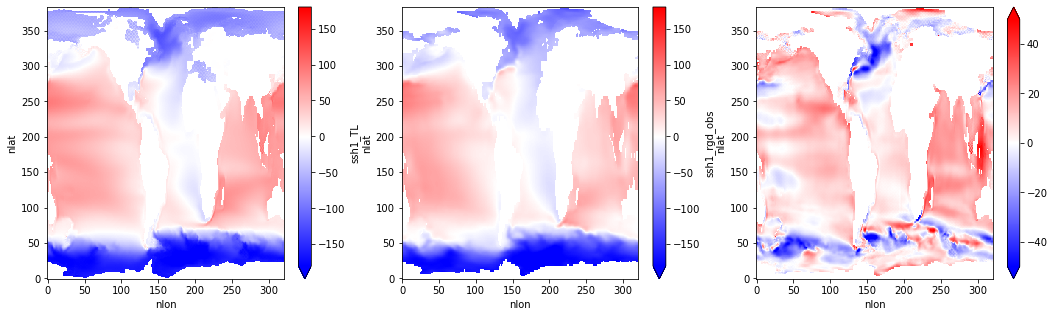

In [25]:
# compare the figure below with Griffies et al., (2014)
fig, axes = plt.subplots(1,3,figsize=(18,5))
ds0_g16_ac.ssh1_TL.plot(ax=axes[0], vmin=-180,vmax=180,cmap='bwr')
ds0_g16_ac.ssh1_rgd_obs.plot(ax=axes[1], vmin=-180,vmax=180,cmap='bwr')
(ds0_g16_ac.ssh1_TL-ds0_g16_ac.ssh1_rgd_obs).plot(ax=axes[2],vmin=-50,vmax=50,cmap='bwr')

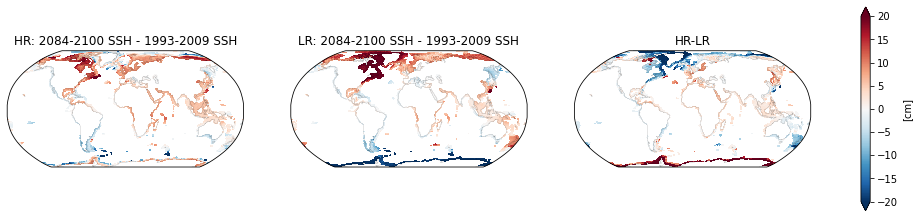

In [26]:
proj = cartopy.crs.Robinson(central_longitude=0)
pc = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(131,projection=proj)
subplt1=ax1.pcolormesh(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
        ds0_g16_ac.ssh_df_rgd_TH.where(ds0_g16_ac.HT_TL<2e5,np.nan), transform=pc, 
        vmin=-20, vmax=20, cmap="RdBu_r")
# subplt1=ax1.pcolormesh(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
#         ds0_g16_ac.ssh1_rgd_TH.where((ht>0)&(ht<1000*100)), transform=pc, vmin=-150, vmax=150, cmap="RdBu_r")
ax1.coastlines(resolution='110m',color='black', linewidth=0.1)
ax1.set_title('HR: 2084-2100 SSH - 1993-2009 SSH')

ax2 = fig.add_subplot(132,projection=proj)
subplt2=ax2.pcolormesh(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
        ds0_g16_ac.ssh_df_TL.where(ds0_g16_ac.HT_TL<2e5,np.nan), transform=pc, 
                       vmin=-20, vmax=20, cmap="RdBu_r")
ax2.coastlines(resolution='110m',color='black', linewidth=0.1)
ax2.set_title('LR: 2084-2100 SSH - 1993-2009 SSH')

ax3 = fig.add_subplot(133,projection=proj)
subplt3=ax3.pcolormesh(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
        (ds0_g16_ac.ssh_df_rgd_TH-ds0_g16_ac.ssh_df_TL).where(ds0_g16_ac.HT_TL<2e5,np.nan), 
                       transform=pc, vmin=-20, vmax=20, cmap="RdBu_r")
ax3.coastlines(resolution='110m',color='black', linewidth=0.1)
ax3.set_title('HR-LR')

# # Now adding the colorbar
cb = fig.colorbar(subplt1, ax=[ax1,ax2,ax3], shrink=0.75,extend='both')
cb.set_label('[cm]')